In [29]:
import cv2
import numpy as np

In [30]:
def sharpen_image(path):
    image = cv2.imread(path)
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    image = cv2.filter2D(image, -1, kernel)
    plt.imshow(image)
    plt.show()
    cv2.imwrite('sharp_' + path, image)

In [31]:
def addaptive_gaussian_noise(path):
    image = cv2.imread(path)
    a,b,c=cv2.split(image)
    a = cv2.adaptiveThreshold(a, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    b = cv2.adaptiveThreshold(b, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    c = cv2.adaptiveThreshold(c, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    image=cv2.merge([a,b,c])
    plt.imshow(image)
    plt.show()
    cv2.imwrite('adap_gauss_'+path, image)

In [40]:
def salt_and_pepper_image(p,a,path):
    image = cv2.imread(path)
    noisy=image
    #salt
    num_salt = np.ceil(a * image.size * p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    noisy[coords] = 1

    #pepper
    num_pepper = np.ceil(a * image.size * (1. - p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    noisy[coords] = 0
    plt.imshow(image)
    plt.show()
    cv2.imwrite('salt_pepper_' + path, image)


In [33]:
def affine_transform(path):
    img = cv2.imread(path)
    rows, cols = img.shape[:2]
    src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
    dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
    affine_matrix = cv2.getAffineTransform(src_points, dst_points)
    img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
    plt.imshow(img_output)
    plt.show()
    cv2.imwrite('affine' + path,img)

In [34]:
path = '/home/mehul/Downloads/washing_machine.jpeg'

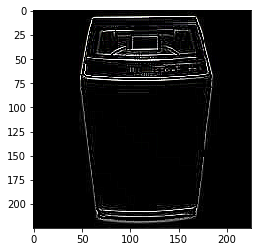

In [36]:
sharpen_image(path)

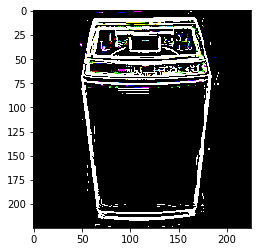

In [37]:
addaptive_gaussian_noise(path)

/home/mehul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/home/mehul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


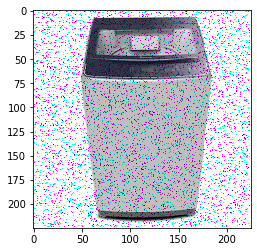

In [43]:
salt_and_paper_image(image,0.5, 0.05, path)

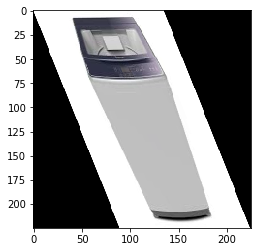

In [39]:
affine_transform(path)